# Dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/training.1600000.processed.noemoticon.csv",encoding='latin-1')
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "Text"]
data.columns = DATASET_COLUMNS

In [ ]:
data.describe(include='all')

,target,ids,date,flag,user,Text
count,1.599999e+06,1.599999e+06,1599999,1599999,1599999,1599999
unique,NaN,NaN,774362,1,659775,1581465
top,NaN,NaN,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,20,1599999,549,210
mean,2.000001e+00,1.998818e+09,NaN,NaN,NaN,NaN
std,2.000001e+00,1.935757e+08,NaN,NaN,NaN,NaN
min,0.000000e+00,1.467811e+09,NaN,NaN,NaN,NaN
25%,0.000000e+00,1.956916e+09,NaN,NaN,NaN,NaN
50%,4.000000e+00,2.002102e+09,NaN,NaN,NaN,NaN
75%,4.000000e+00,2.177059e+09,NaN,NaN,NaN,NaN


In [ ]:
data.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
Text      object
dtype: object

Get a subset of data to speed it up.

In [ ]:
import copy
data_ = copy.deepcopy(data)

positif_data = data_[data_.target==4].iloc[:80000,:]
negative_data = data_[data_.target==0].iloc[:80000,:]

sub_data = pd.concat([positif_data,negative_data],axis=0)

# Data explore

### Target

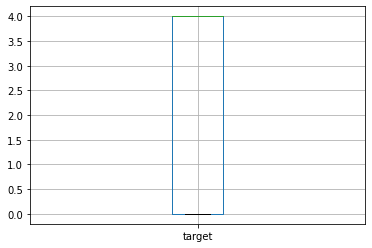

In [ ]:
data.boxplot(column='target')

In [ ]:
data_target=data.groupby('target')

In [ ]:
data['target'].value_counts()

4    800000
0    799999
Name: target, dtype: int64

## Date

At what time do people like to tweet? Is there a clear link between the time of tweeting and the emotion of the content?

In [ ]:
data.head()

,target,ids,date,flag,user,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
data_ = {'target': data['target'], 'date': data['date']}
df = pd.DataFrame(data_)
df.head()

,target,date
0,0,Mon Apr 06 22:19:49 PDT 2009
1,0,Mon Apr 06 22:19:53 PDT 2009
2,0,Mon Apr 06 22:19:57 PDT 2009
3,0,Mon Apr 06 22:19:57 PDT 2009
4,0,Mon Apr 06 22:20:00 PDT 2009


In [ ]:

df['date'] = pd.to_datetime(df['date'])

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [ ]:
hour = [ df['date'][i].hour for i in range(len(df['date'])) ]
df['hour'] = hour
df.head()

,target,date,hour
0,0,2009-04-06 22:19:49,22
1,0,2009-04-06 22:19:53,22
2,0,2009-04-06 22:19:57,22
3,0,2009-04-06 22:19:57,22
4,0,2009-04-06 22:20:00,22


In [ ]:
hour_data = {'0': [0]*24, '2': [0]*24, '4': [0]*24}
for i in range(len(df['hour'])):
    target = str(df['target'][i])
    hour = int(df['hour'][i])
    hour_data[target][hour] += 1

In [ ]:
hour_data = [hour_data['0'], hour_data['2'], hour_data['4']]
# Transpose
hour_data = list(map(list,zip(*hour_data)))

In [ ]:
df1 = pd.DataFrame(hour_data,index = [i for i in range(24)],columns=['negative', 'neutral', 'positive'])

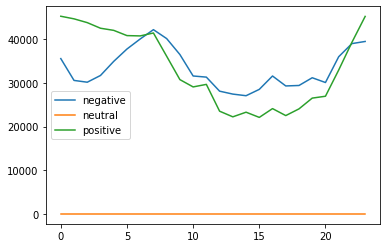

In [ ]:
df1.plot()

## @

Does @Behavior reflect the mood of that tweet?

In [ ]:
positive_at_count = 0
negative_at_count = 0
TweetTextList = list(sub_data['Text'])
targetList = list(sub_data['target'])
for i in range(len(sub_data['Text'])):
    if TweetTextList[i].find('@') != -1:
        if targetList[i] == 4:
            positive_at_count += 1
        else:
            negative_at_count += 1
at_counts = [positive_at_count, negative_at_count]

<BarContainer object of 2 artists>

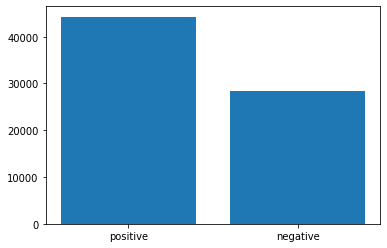

In [ ]:
import matplotlib.pyplot as plt
names = ['positive', 'negative']
values = [positive_at_count, negative_at_count]
plt.bar(names, values)

## Words

Words distribution.

In [ ]:
import copy
newdata = copy.deepcopy(sub_data)
newdata.drop(['ids','date','flag','user'],axis = 1,inplace = True)

In [ ]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

import re
import nltk
import string
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

What are the most common words in dataset?

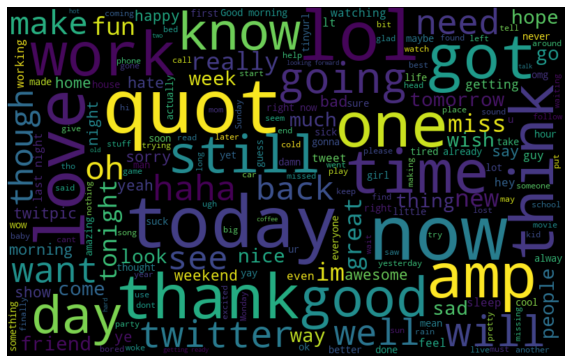

In [ ]:
all_words = ' '.join([text for text in newdata['Text']])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

What are the most common positive words in dataset?

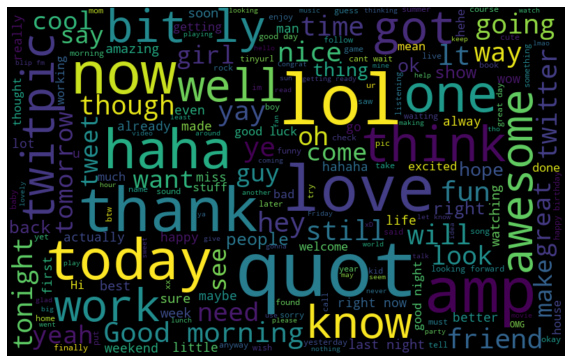

In [ ]:
positive_words = ' '.join([text for text in data['Text'][data['target']==4]])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(positive_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

What are the most common negative words in dataset?

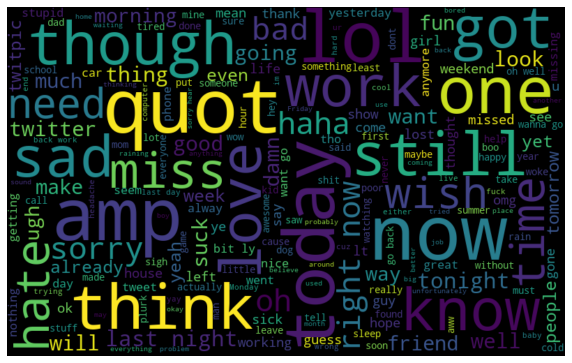

In [ ]:
negative_words = ' '.join([text for text in data['Text'][data['target']==0]])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

# Data preprocess

In [ ]:
positif_data = data[data.target==4].iloc[:10000,:]
print(positif_data.shape)
negative_data = data[data.target==0].iloc[:10000,:]
print(negative_data.shape)
data = pd.concat([positif_data,negative_data],axis = 0)
print(data.shape)
data.head()

(10000, 6)
(10000, 6)
(20000, 6)


,target,ids,date,flag,user,Text
799999,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800000,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800001,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800002,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800003,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [ ]:
# Removing Twitter Handles
data['Clean_TweetText'] = data['Text'].str.replace("@", "") 
# Removing links
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace(r"http\S+", "") 
# Removing Punctuations, Numbers, and Special Characters
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace("[^a-zA-Z]", " ") 
# Remove stop words
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda text : remove_stopwords(text.lower()))
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,target,ids,date,flag,user,Text,Clean_TweetText
799999,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!,love health uandpets u guys r best
800000,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...,im meeting one besties tonight cant wait girl ...
800001,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",darealsunisakim thanks twitter add sunisa got ...
800002,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...,sick really cheap hurts much eat real food plu...
800003,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyone


In [ ]:
# Text Tokenization
nltk.download('punkt')
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: nltk.word_tokenize(x))
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,target,ids,date,flag,user,Text,Clean_TweetText
799999,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!,"[love, health, uandpets, u, guys, r, best]"
800000,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...,"[im, meeting, one, besties, tonight, cant, wai..."
800001,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...","[darealsunisakim, thanks, twitter, add, sunisa..."
800002,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...,"[sick, really, cheap, hurts, much, eat, real, ..."
800003,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,"[lovesbrooklyn, effect, everyone]"


In [ ]:
# Now let’s stitch these tokens back together
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
# Removing small words
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head()

,target,ids,date,flag,user,Text,Clean_TweetText
799999,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!,love health uandpets guys best
800000,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...,meeting besties tonight cant wait girl talk
800001,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",darealsunisakim thanks twitter sunisa meet sho...
800002,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...,sick really cheap hurts much real food plus fr...
800003,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyone


# Models

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(data['Clean_TweetText'])
cv.shape

(20000, 24904)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(cv,data['target'] , test_size=.2,stratify=data['target'], random_state=42)

In [ ]:
# XGBC
xgbc = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(prediction_xgb,y_test))

0.70375


In [ ]:
# RandomForest
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train,y_train)
prediction_rf = rf.predict(X_test)
print(accuracy_score(prediction_rf,y_test))

0.6835


In [ ]:
import pickle
pickle.dump(xgbc, open('xgbc.pkl', 'wb'))

In [ ]:
pickle.dump(rf, open('rf.pkl', 'wb'))